In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(10,10))
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False,'figure.figsize':(20,10)}, style='darkgrid')

<Figure size 720x720 with 0 Axes>

In [3]:
DF = pd.read_excel('./국내철도뉴스_공공데이터 목록 (철도산업정보센터).xls')
DF

,국내철도뉴스 목록,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,게시물등록일,기사제목,출처명
2,2022-07-12,"“기차로 떠나세요, 여행이 가벼워집니다!”",한국철도공사
3,2022-07-12,강소도시 융복합 클러스터 조성 사업 공모,국토교통부
4,2022-07-11,국민이 공감하는 철도안전사업 추진을 위한 오피니언 리더 초청 정책세미나 개최,한국교통안전공단
...,...,...,...
21788,2012-11-16,"코레일, ‘아름다운 화장실’ 우수기관 선정",한국철도공사
21789,2012-11-16,고졸 139명 등 410명 정규직 채용,한국철도공사
21790,NaN,NaN,NaN
21791,NaN,NaN,NaN


In [3]:
DF.dtypes

국내철도뉴스 목록     object
Unnamed: 1    object
Unnamed: 2    object
dtype: object

In [4]:
DF = DF.drop(0, axis = 0)
DF

,국내철도뉴스 목록,Unnamed: 1,Unnamed: 2
1,게시물등록일,기사제목,출처명
2,2022-07-12,"“기차로 떠나세요, 여행이 가벼워집니다!”",한국철도공사
3,2022-07-12,강소도시 융복합 클러스터 조성 사업 공모,국토교통부
4,2022-07-11,국민이 공감하는 철도안전사업 추진을 위한 오피니언 리더 초청 정책세미나 개최,한국교통안전공단
5,2022-07-11,2023년 고객참여예산 제안 공모,대전교통공사
...,...,...,...
21788,2012-11-16,"코레일, ‘아름다운 화장실’ 우수기관 선정",한국철도공사
21789,2012-11-16,고졸 139명 등 410명 정규직 채용,한국철도공사
21790,NaN,NaN,NaN
21791,NaN,NaN,NaN


In [5]:
DF.columns = ["게시물등록일", "기사제목", "출처명"]
DF = DF.drop(1)

In [7]:
DF[DF["기사제목"].str.len() >= 10]

,게시물등록일,기사제목,출처명
2,2022-07-12,"“기차로 떠나세요, 여행이 가벼워집니다!”",한국철도공사
3,2022-07-12,강소도시 융복합 클러스터 조성 사업 공모,국토교통부
4,2022-07-11,국민이 공감하는 철도안전사업 추진을 위한 오피니언 리더 초청 정책세미나 개최,한국교통안전공단
5,2022-07-11,2023년 고객참여예산 제안 공모,대전교통공사
6,2022-07-11,"SR, 행정안전부 재난관리평가‘우수’등급 획득",(주)SR
...,...,...,...
21785,2012-11-19,철도연 한국콘크리트학회에서 ‘기술상 ’수상!,철도기술연구원
21786,2012-11-16,정평역에 가면 경산의 봄 여름 가을 겨울이 있다,대구도시철도공사
21787,2012-11-16,경원선 통근열차 백마고지역(철원)까지 운행,한국철도공사
21788,2012-11-16,"코레일, ‘아름다운 화장실’ 우수기관 선정",한국철도공사


In [8]:
DF.isna()

,게시물등록일,기사제목,출처명
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
...,...,...,...
21788,False,False,False
21789,False,False,False
21790,True,True,True
21791,True,True,True


In [9]:
DF["출처명"].isna()

2        False
3        False
4        False
5        False
6        False
         ...  
21788    False
21789    False
21790     True
21791     True
21792    False
Name: 출처명, Length: 21791, dtype: bool

In [10]:
DF = DF.drop([21790, 21791, 21792])

In [11]:
topic_lis = DF["기사제목"]
topic_lis = topic_lis.tolist()
topic_lis

['“기차로 떠나세요, 여행이 가벼워집니다!”',
 '강소도시 융복합 클러스터 조성 사업 공모',
 '국민이 공감하는 철도안전사업 추진을 위한 오피니언 리더 초청 정책세미나 개최',
 '2023년 고객참여예산 제안 공모',
 'SR, 행정안전부 재난관리평가‘우수’등급 획득',
 '고속철도 서대구역 합동 안전점검 실시',
 '동해남부선·중앙선 폐선(경주시 구간) 민간개발 공모',
 '나희승 한국철도 사장, 대구·부산지역 현장 안전 활동',
 '서울교통공사, 지하철 불법전단물 집중단속 나선다',
 '인천교통공사, 제11기 시민모니터 위촉',
 '한국교통안전공단, 노사합동 도서기부 사회공헌 펼쳐',
 '광주도시철도, ‘제17회 지방공기업의 날’ 행안부 장관상',
 '광주도시철도 안내표지판 디자인 개선 “한눈에 보여요”',
 '광주도시철도에서 ‘찾아가는 마음안심버스’ 타요',
 '중미경제통합은행(CABEI) 방한단에 K-철도 홍보',
 '인천교통공사, 인천1호선 임학변전소 전력설비 개량사업 준공기념 경영자 현장 시찰',
 'SRT 대전조차장 탈선사고 보상 이렇게 신청하세요',
 '선진 보상문화 정착에 앞장선다',
 '코레일 열차승무원, KTX서 소중한 생명 구해',
 '한국철도, 150억원 규모 ‘탄자니아 철도사업’ 수주',
 '인천교통공사, 함께하는 나눔문화 확산을 위한 희망나눔 천원기부 캠페인 실시',
 '대구도시철도 전 역사 외부 엘리베이터 에어컨 설치',
 '「2022년 상반기 적극행정·시정혁신 경진대회」최우수상 수상',
 '대구도시철도공사, 코로나 속 해외사업 연이은 성과',
 '대구도시철도,「제6기 DTRO 시민기자단」모집',
 'SRT 열차사고 비상대응 매뉴얼 전면 개편',
 '한국철도, 전국 100여개 기차역서 ‘사이버 안보 캠페인’',
 '한국철도, 7월 31일부터 강릉선 KTX-이음 일부 운행조정',
 '지자체 공익목적의 철도 국유재산 사용료 대폭 낮춰',
 '평택지제역 재난대응 소방서 합동훈련',
 '한국철도, SRT 궤도이탈 사고 관련 특별 안전

In [12]:
topic_key = []
topic_value = []

for word in topic_lis:
    word = word.split(',') #' ,' 기점으로 스트링 분리
    topic_key.append(word) #분리된 단어들을 리스트에 새로 정렬   

for i in range(len(topic_key)):
    for word in topic_key[i]:
        word = word.split(' ') #' '를 기점으로 스트링 분리
        topic_value.append(word) #제거된 리스트를 새로운 리스트에 삽입

print(topic_value)     

[['“기차로', '떠나세요'], ['', '여행이', '가벼워집니다!”'], ['강소도시', '융복합', '클러스터', '조성', '사업', '공모'], ['국민이', '공감하는', '철도안전사업', '추진을', '위한', '오피니언', '리더', '초청', '정책세미나', '개최'], ['2023년', '고객참여예산', '제안', '공모'], ['SR'], ['', '행정안전부', '재난관리평가‘우수’등급', '획득'], ['고속철도', '서대구역', '합동', '안전점검', '실시'], ['동해남부선·중앙선', '폐선(경주시', '구간)', '민간개발', '공모'], ['나희승', '한국철도', '사장'], ['', '대구·부산지역', '현장', '안전', '활동'], ['서울교통공사'], ['', '지하철', '불법전단물', '집중단속', '나선다'], ['인천교통공사'], ['', '제11기', '시민모니터', '위촉'], ['한국교통안전공단'], ['', '노사합동', '도서기부', '사회공헌', '펼쳐'], ['광주도시철도'], ['', '‘제17회', '지방공기업의', '날’', '행안부', '장관상'], ['광주도시철도', '안내표지판', '디자인', '개선', '“한눈에', '보여요”'], ['광주도시철도에서', '‘찾아가는', '마음안심버스’', '타요'], ['중미경제통합은행(CABEI)', '방한단에', 'K-철도', '홍보'], ['인천교통공사'], ['', '인천1호선', '임학변전소', '전력설비', '개량사업', '준공기념', '경영자', '현장', '시찰'], ['SRT', '대전조차장', '탈선사고', '보상', '이렇게', '신청하세요'], ['선진', '보상문화', '정착에', '앞장선다'], ['코레일', '열차승무원'], ['', 'KTX서', '소중한', '생명', '구해'], ['한국철도'], ['', '150억원', '규모', '‘탄자니아', '철도사업’', '수주'], ['인천교통공사'], ['', '함께하는',

In [14]:
topic_words = {}
for k in range(len(topic_value)):
    for i in topic_value[k]:
        if i not in topic_words:
            topic_words[i] = 1 #최초 언어
        elif i in topic_words:
            topic_words[i] += 1 #중복 언어
print(topic_words)

{'“기차로': 1, '떠나세요': 4, '': 12866, '여행이': 2, '가벼워집니다!”': 1, '강소도시': 1, '융복합': 3, '클러스터': 2, '조성': 80, '사업': 154, '공모': 216, '국민이': 6, '공감하는': 1, '철도안전사업': 1, '추진을': 7, '위한': 820, '오피니언': 2, '리더': 3, '초청': 109, '정책세미나': 5, '개최': 1114, '2023년': 2, '고객참여예산': 1, '제안': 13, 'SR': 333, '행정안전부': 13, '재난관리평가‘우수’등급': 1, '획득': 85, '고속철도': 99, '서대구역': 9, '합동': 145, '안전점검': 140, '실시': 693, '동해남부선·중앙선': 1, '폐선(경주시': 1, '구간)': 5, '민간개발': 2, '나희승': 26, '한국철도': 570, '사장': 244, '대구·부산지역': 1, '현장': 153, '안전': 231, '활동': 99, '서울교통공사': 151, '지하철': 524, '불법전단물': 1, '집중단속': 10, '나선다': 42, '인천교통공사': 773, '제11기': 3, '시민모니터': 29, '위촉': 47, '한국교통안전공단': 33, '노사합동': 42, '도서기부': 1, '사회공헌': 32, '펼쳐': 213, '광주도시철도': 422, '‘제17회': 1, '지방공기업의': 2, '날’': 15, '행안부': 13, '장관상': 25, '안내표지판': 3, '디자인': 37, '개선': 123, '“한눈에': 1, '보여요”': 2, '광주도시철도에서': 13, '‘찾아가는': 6, '마음안심버스’': 1, '타요': 1, '중미경제통합은행(CABEI)': 1, '방한단에': 1, 'K-철도': 1, '홍보': 69, '인천1호선': 5, '임학변전소': 1, '전력설비': 1, '개량사업': 16, '준공기념': 2, '경영자': 3, '시찰': 1, 'SRT': 

In [16]:
word_df = pd.DataFrame(topic_words.items()) #딕셔너리 --> 데이터 프레임 
word_df.columns = ['단어', '빈도'] #칼럼 명 설정
topic_word_df = word_df.sort_values(['빈도'],ascending = False).head(20) #빈도 기준 내림차순 정렬 및 상위 20개만 추출
topic_word_df = topic_word_df.drop(2)
topic_word_df.reset_index(drop = True, inplace = True)

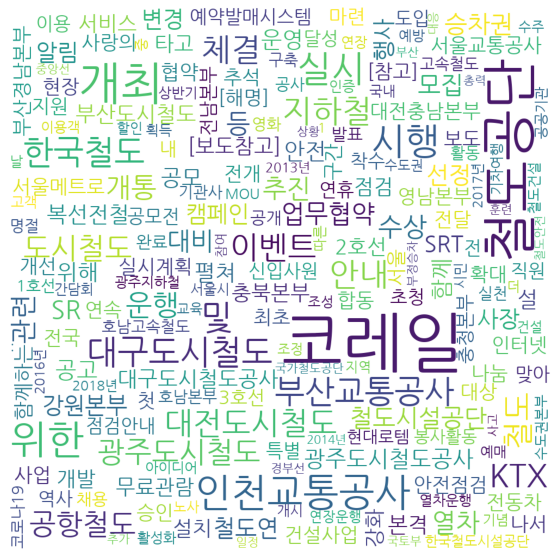

In [26]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path = 'C:/Users/day1/Downloads/나눔 글꼴/나눔고딕/NanumGothic.ttf',
                     background_color = "white",
                     width = 1000,
                     height = 1000,
                     max_words = 200,
                     max_font_size = 200).generate_from_frequencies(topic_words)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()